In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [176]:
# matplotlib.rcParams.update({'font.size': 25})

In [232]:

file_name = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/log_nes14.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
    "avg_accepted": [],
    "max_accepted": [],
    "min_accepted": [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))
        if words[0] == "Avg_accepted":
            losses["avg_accepted"].append(float(words[-1]))
        if words[0] == "Min_accepted":
            losses["min_accepted"].append(float(words[-1]))
        if words[0] == "Max_accepted":
            losses["max_accepted"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [233]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

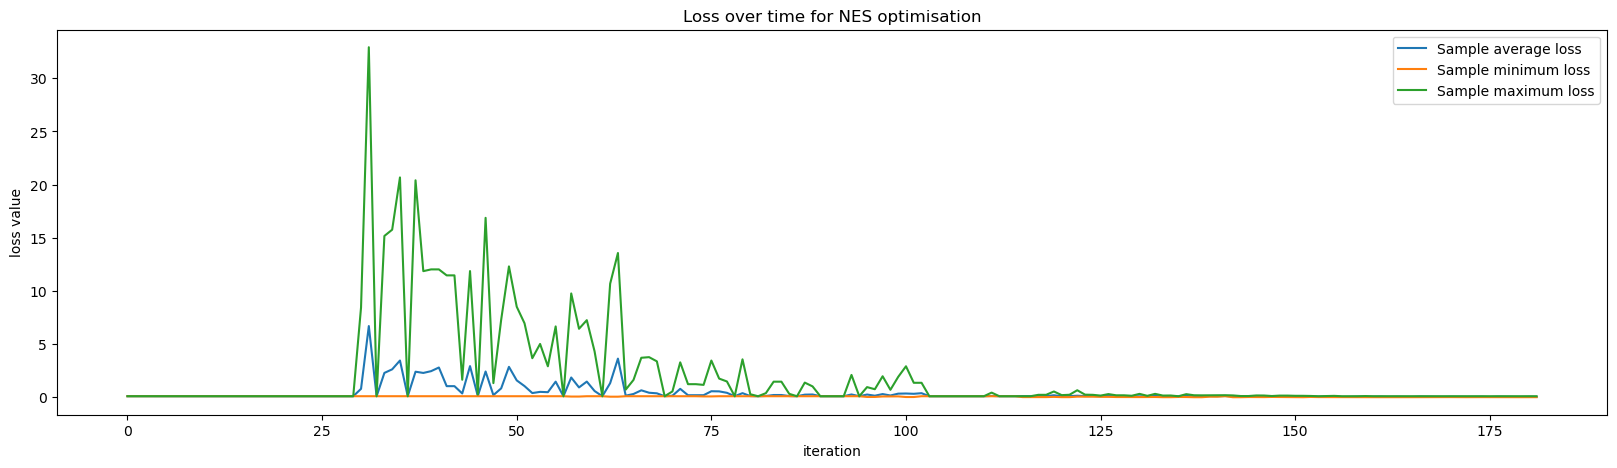

In [234]:
plt.figure(figsize=(20,5))
# plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

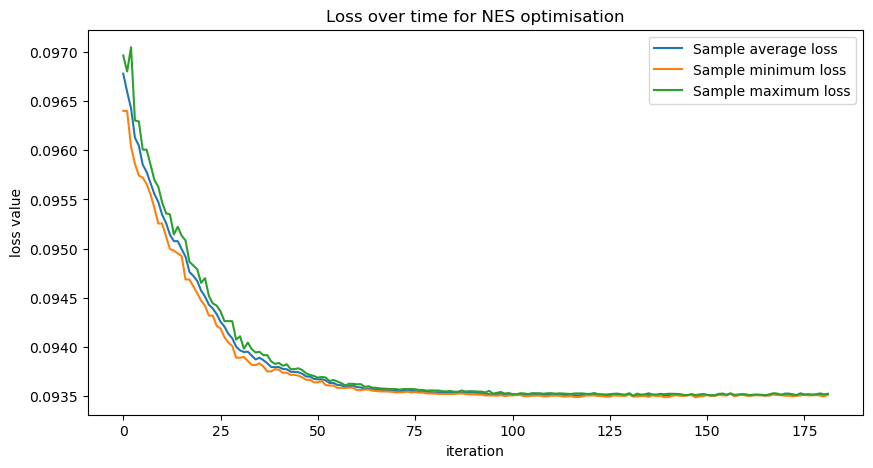

In [235]:
plt.figure(figsize=(10,5))
# plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg_accepted"], label="Sample average loss")
plt.plot(loss_df["min_accepted"], label="Sample minimum loss")
plt.plot(loss_df["max_accepted"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

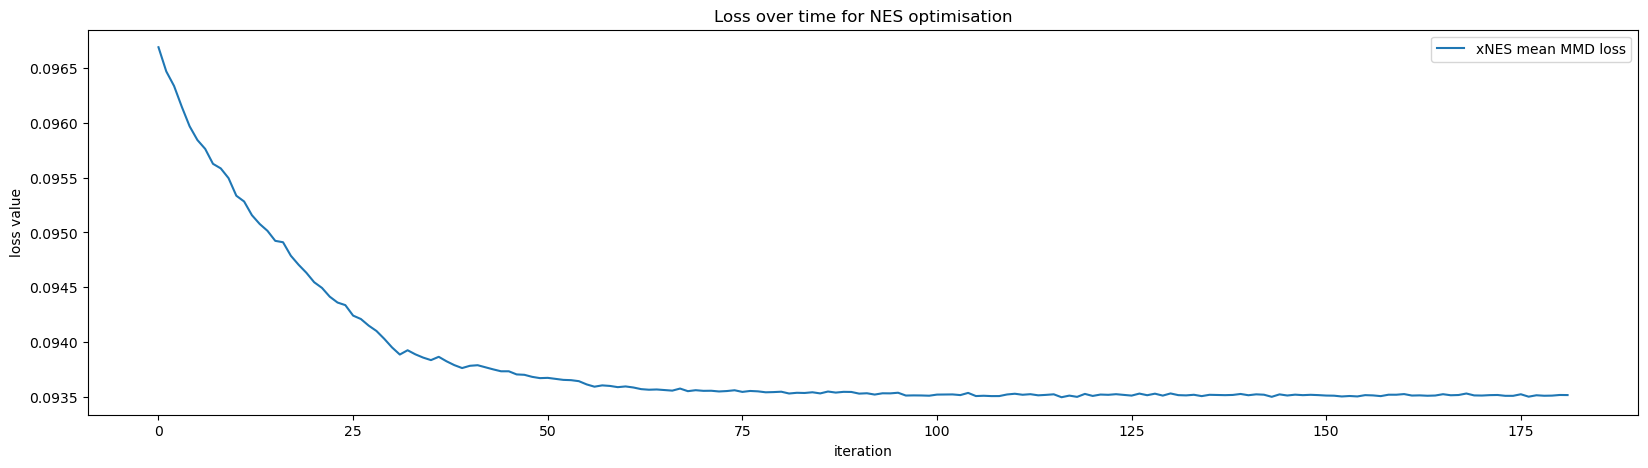

In [236]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [237]:
def plot_standing_average(array, show=True, label=""):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    plt.plot(standing_average, label=label)
    print(standing_average[75] - standing_average[74])
    if show:
        plt.show()

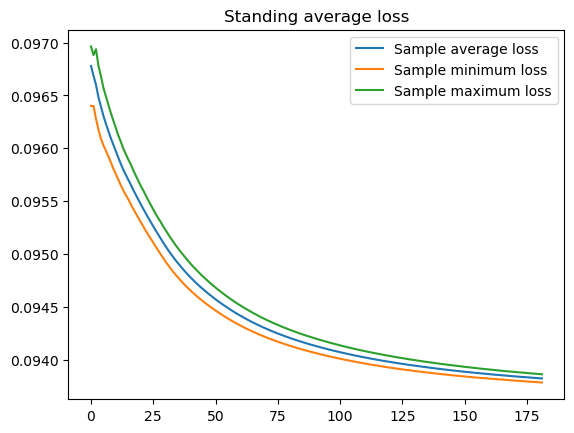

In [238]:
# plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False, label="Distribution mean loss")
plot_standing_average(loss_df["avg_accepted"].to_numpy().squeeze(), show=False, label="Sample average loss")
plot_standing_average(loss_df["min_accepted"].to_numpy().squeeze(), show=False, label="Sample minimum loss")
plot_standing_average(loss_df["max_accepted"].to_numpy().squeeze(), show=False, label="Sample maximum loss")
plt.title("Standing average loss")
plt.legend()
plt.show()

# plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [239]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.09381594427011822
std: 0.0006484906700607706
max: 0.0966927409172058
min: 0.0934935510158538
range: 0.003199189901351998


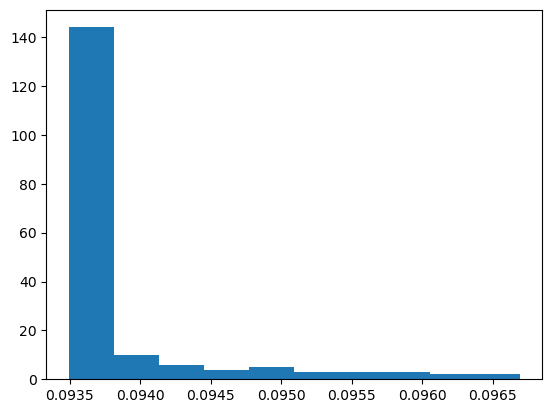

mean: 0.09382135564318066
std: 0.0006583880791042253
max: 0.0967793092131614
min: 0.0935001000761985
range: 0.0032792091369629045


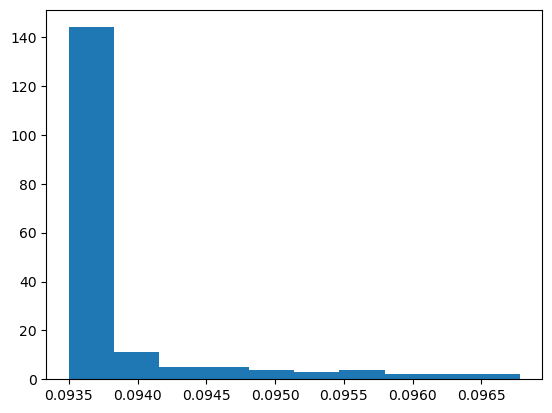

mean: 0.09378320715584594
std: 0.0006024354388100357
max: 0.0964013263583183
min: 0.0934884995222091
range: 0.002912826836109203


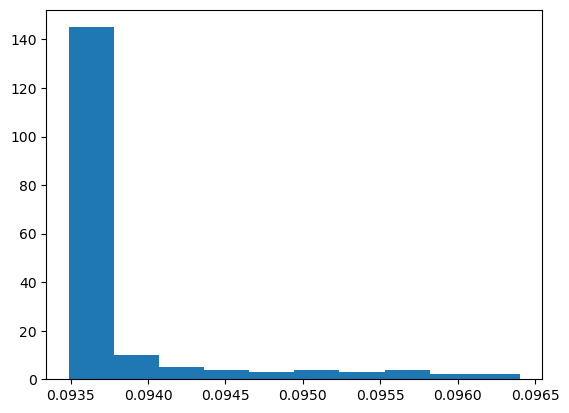

mean: 0.0938608742186001
std: 0.0007165770402527495
max: 0.097048245370388
min: 0.0935028940439224
range: 0.0035453513264656067


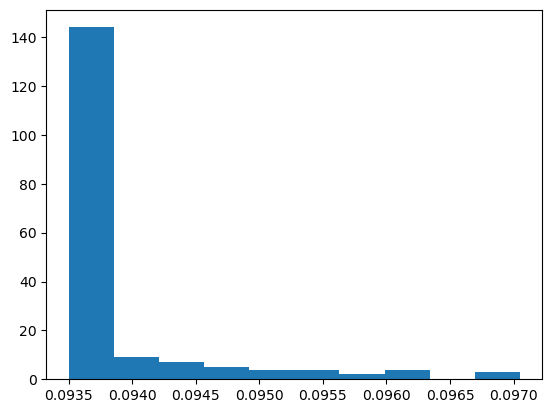

mean: 0.09381594427011822
std: 0.0006484906700607706
max: 0.0966927409172058
min: 0.0934935510158538
range: 0.003199189901351998


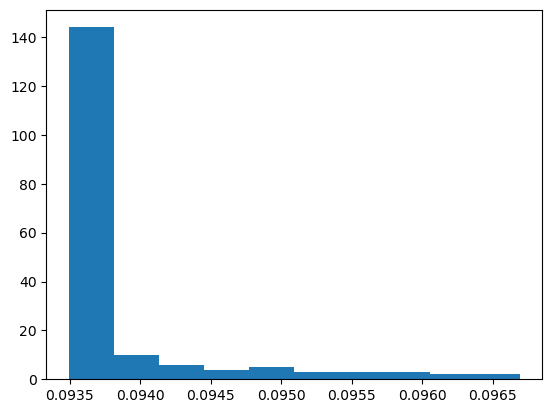

In [240]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["min_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["max_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

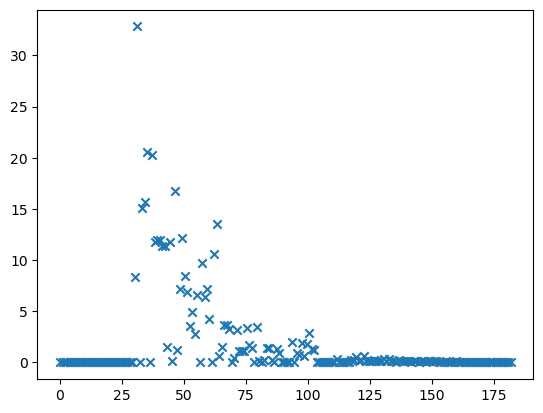

mean: 2.0068376600987965
std: 4.598321942748563
max: 32.822766087949276
min: 1.9095838069901894e-05
range: 32.822746992111206


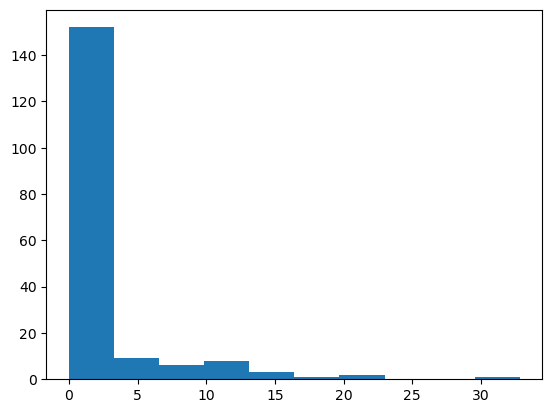

In [241]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())